<a href="https://colab.research.google.com/github/YuHsin-Chen1221/Medical-Diagnosis-Models/blob/main/Cancer_Prediction_with_Gene_Expression_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cancer_gene_expression.csv to cancer_gene_expression.csv


In [ ]:
import pandas as pd
df = pd.read_csv("cancer_gene_expression.csv")
df.head()

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_7992,gene_7993,gene_7994,gene_7995,gene_7996,gene_7997,gene_7998,gene_7999,gene_8000,Cancer_Type
0,0.0,0.0,0.0,2.088413,0.0,0.0,0.0,0.0,0.550605,2.815760,...,11.558803,8.881802,6.014840,6.643534,11.740624,7.065012,9.932659,6.928584,2.088413,KIRC
1,0.0,0.0,0.0,3.205955,0.0,0.0,0.0,0.0,0.425244,2.354396,...,11.062829,9.032864,5.054193,6.432320,12.104985,7.300746,9.872796,5.039231,2.448002,KIRC
2,0.0,0.0,0.0,4.746646,0.0,0.0,0.0,0.0,2.639417,1.657091,...,12.497640,7.198160,0.943434,7.371690,11.202356,8.426588,11.176890,3.119738,4.433988,BRCA
3,0.0,0.0,0.0,1.173191,0.0,0.0,0.0,0.0,1.527371,2.732899,...,11.261713,8.725676,6.300418,6.036451,11.732303,7.559469,9.596453,2.863046,3.380342,KIRC
4,0.0,0.0,0.0,1.366532,0.0,0.0,0.0,0.0,0.000000,3.388355,...,12.241965,7.685204,5.142948,6.355788,11.493950,8.139444,10.189256,6.544487,0.839395,COAD


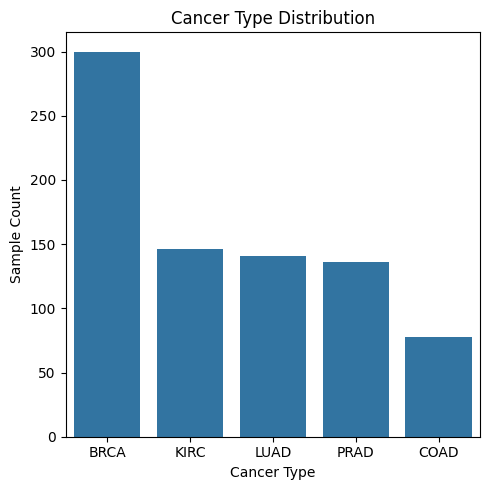

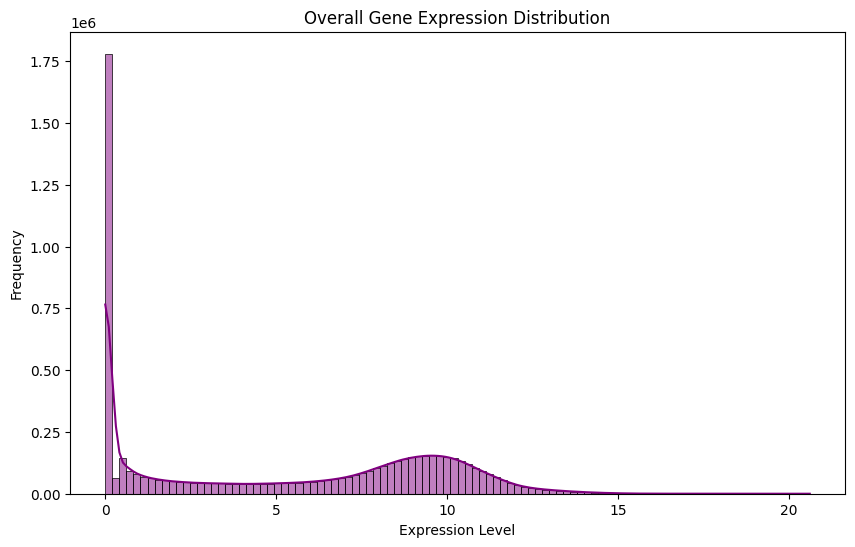

In [ ]:
# EDA (exploratory data analysis)

df.shape
import matplotlib.pyplot as plt
import seaborn as sns

# class distribution bar plot
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='Cancer_Type', order=df['Cancer_Type'].value_counts().index)

plt.title("Cancer Type Distribution")
plt.xlabel("Cancer Type")
plt.ylabel("Sample Count")
plt.tight_layout()
plt.show()

# gene expression distribution histogram
X = df.drop(columns=["Cancer_Type"])
plt.figure(figsize=(10, 6))
sns.histplot(X.values.flatten(), bins=100, kde=True, color="purple")

plt.title("Overall Gene Expression Distribution")
plt.xlabel("Expression Level")
plt.ylabel("Frequency")
plt.show()


Processing KIRC ...


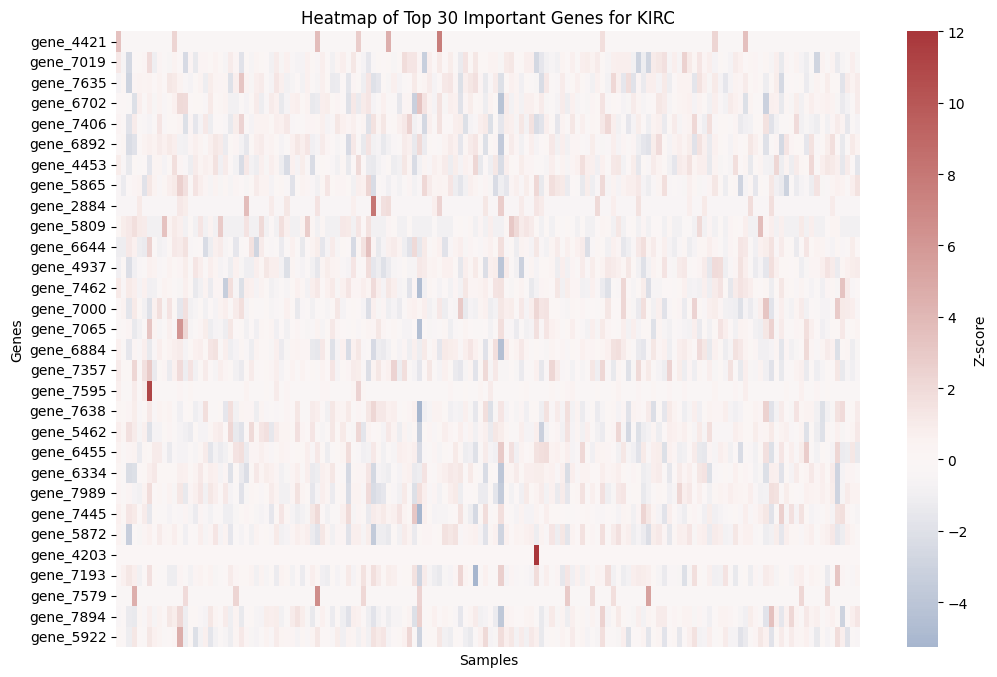

Processing BRCA ...


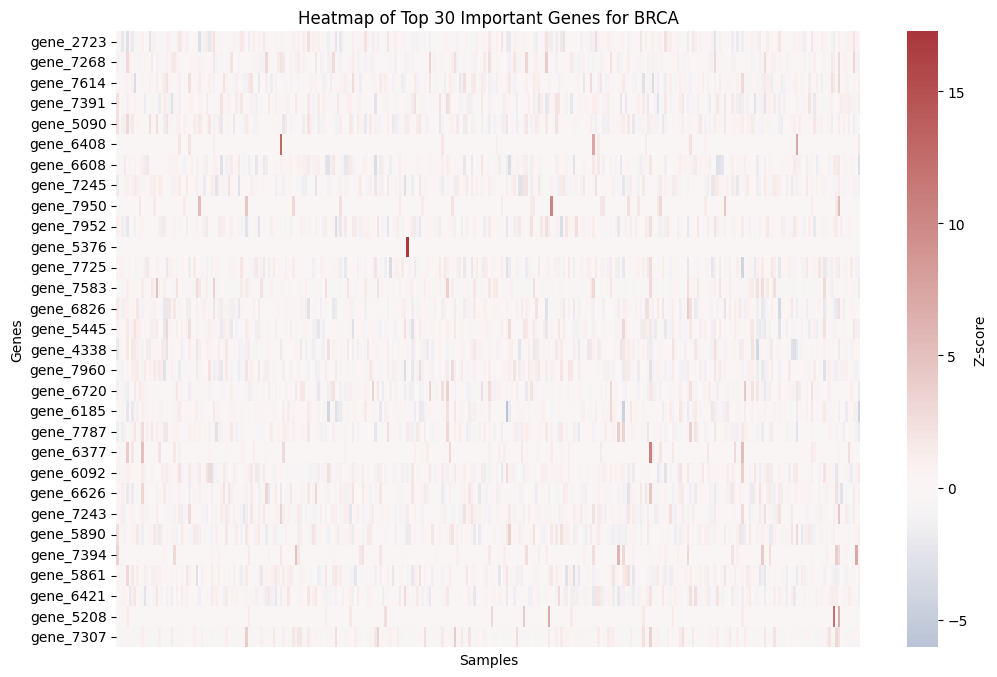

Processing COAD ...


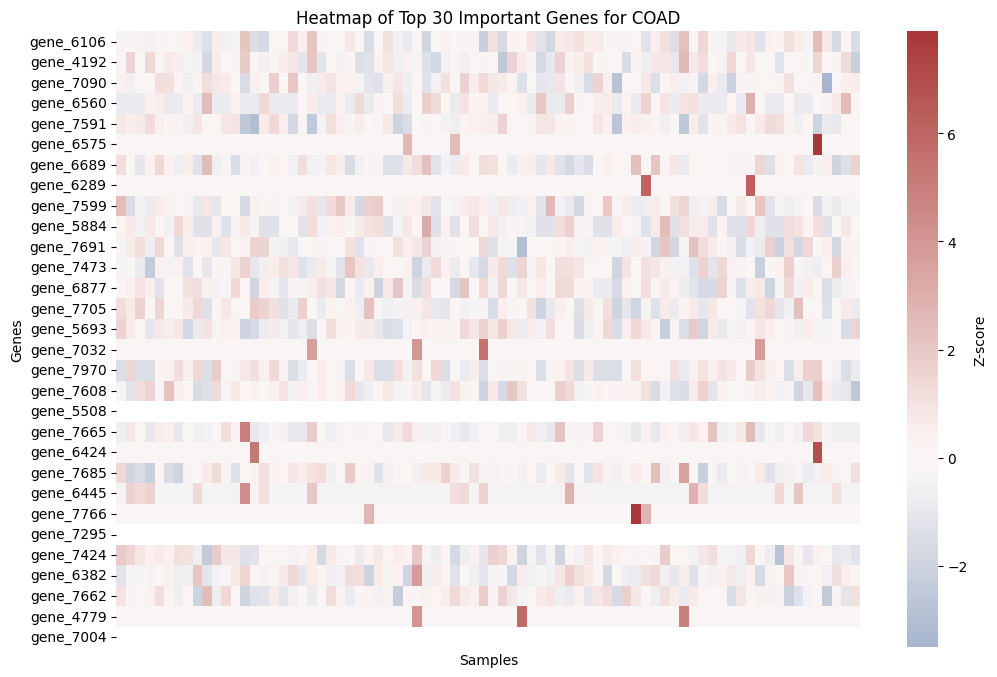

Processing LUAD ...


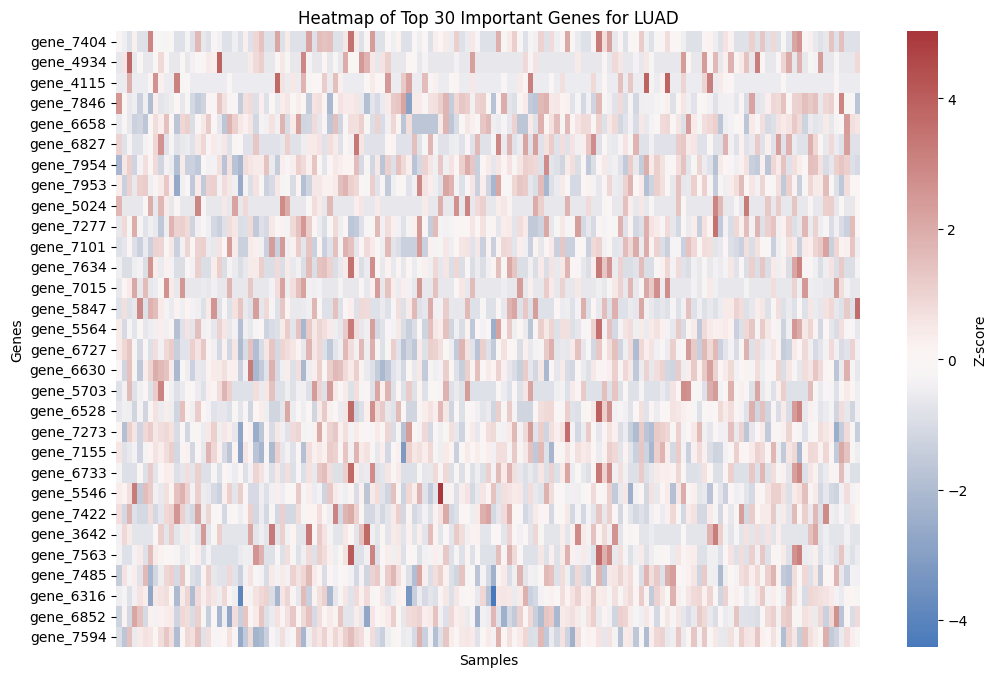

Processing PRAD ...


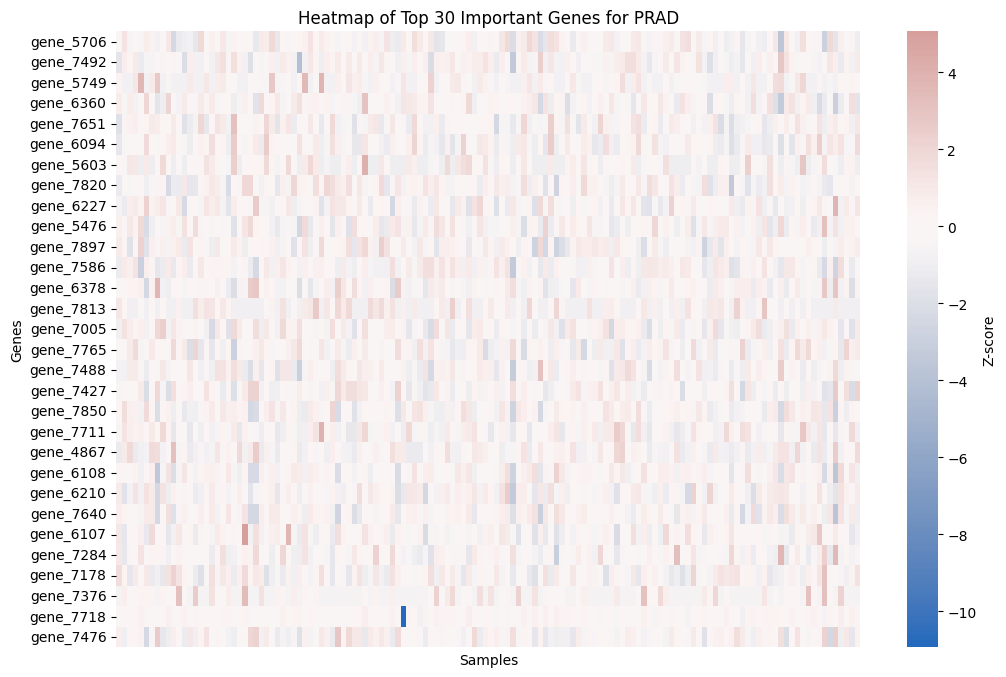

In [ ]:
# heatmap: correlation between genes and cancer types

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelBinarizer

X = df.drop(columns=["Cancer_Type"])
y = df["Cancer_Type"]
cancer_types = y.unique()

lb = LabelBinarizer()
Y_bin = lb.fit_transform(y) # shape: (samples, n_classes)

top_genes_per_cancer = {}

for i, cancer in enumerate(cancer_types):
    print(f"Processing {cancer} ...")

    y_binary = Y_bin[:, i]
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X, y_binary)

    importances = clf.feature_importances_
    top_idx = np.argsort(importances)[-30:]  # top 30 indices

    top_genes = X.columns[top_idx]
    top_genes_per_cancer[cancer] = top_genes

    samples_of_cancer = df[df["Cancer_Type"] == cancer]
    X_subset = samples_of_cancer[top_genes]

    X_scaled = (X_subset - X_subset.mean()) / X_subset.std()

    plt.figure(figsize=(12, 8))
    sns.heatmap(
        X_scaled.T,
        cmap="vlag",
        cbar_kws={'label': 'Z-score'},
        xticklabels=False,
        yticklabels=top_genes,
        center=0
    )

    plt.title(f"Heatmap of Top 30 Important Genes for {cancer}")
    plt.xlabel("Samples")
    plt.ylabel("Genes")
    plt.show()


In [ ]:
# data splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
min_max_scaler=MinMaxScaler()
x_train_norm=min_max_scaler.fit_transform(x_train)
x_test_norm=min_max_scaler.fit_transform(x_test)

# Encode labels to numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
print(X.head())
print(y.head())

   gene_1  gene_2  gene_3    gene_4  gene_5  gene_6  gene_7  gene_8    gene_9  \
0     0.0     0.0     0.0  2.088413     0.0     0.0     0.0     0.0  0.550605   
1     0.0     0.0     0.0  3.205955     0.0     0.0     0.0     0.0  0.425244   
2     0.0     0.0     0.0  4.746646     0.0     0.0     0.0     0.0  2.639417   
3     0.0     0.0     0.0  1.173191     0.0     0.0     0.0     0.0  1.527371   
4     0.0     0.0     0.0  1.366532     0.0     0.0     0.0     0.0  0.000000   

    gene_10  ...  gene_7991  gene_7992  gene_7993  gene_7994  gene_7995  \
0  2.815760  ...   6.883022  11.558803   8.881802   6.014840   6.643534   
1  2.354396  ...   6.271456  11.062829   9.032864   5.054193   6.432320   
2  1.657091  ...   8.417734  12.497640   7.198160   0.943434   7.371690   
3  2.732899  ...   4.767210  11.261713   8.725676   6.300418   6.036451   
4  3.388355  ...   7.594086  12.241965   7.685204   5.142948   6.355788   

   gene_7996  gene_7997  gene_7998  gene_7999  gene_8000  
0  

In [ ]:
# model building: ML RandomForest
RF = RandomForestClassifier(max_features=0.2)
RF.fit(x_train_norm,y_train) # RandomForest can handle string labels
y_pred_1 = RF.predict(x_test_norm)

# model building: ML XGBoost
from xgboost import XGBClassifier

XGB = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    objective='multi:softprob',
    num_class=5 # Since we have 5 cancer types
)

XGB.fit(x_train_norm, y_train_encoded) # Use encoded labels for XGBoost
y_pred_2 = XGB.predict(x_test_norm)

# Decode XGBoost predictions back to original labels for evaluation
y_pred_2 = label_encoder.inverse_transform(y_pred_2)

RandomForest Accuracy: 0.9751552795031055
XGBoost Accuracy: 0.9875776397515528

RandomForest Classification Report:
              precision    recall  f1-score   support

        BRCA       0.95      1.00      0.98        60
        COAD       1.00      0.88      0.93        16
        KIRC       1.00      1.00      1.00        28
        LUAD       0.96      0.92      0.94        24
        PRAD       1.00      1.00      1.00        33

    accuracy                           0.98       161
   macro avg       0.98      0.96      0.97       161
weighted avg       0.98      0.98      0.97       161


XGBoost Classification Report:
              precision    recall  f1-score   support

        BRCA       0.97      1.00      0.98        60
        COAD       1.00      1.00      1.00        16
        KIRC       1.00      1.00      1.00        28
        LUAD       1.00      0.96      0.98        24
        PRAD       1.00      0.97      0.98        33

    accuracy                         

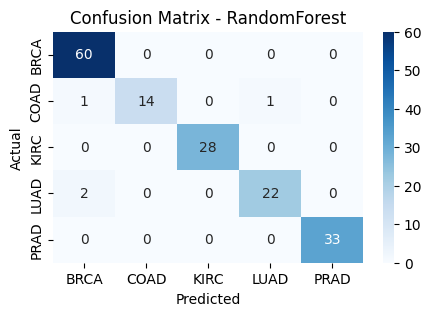

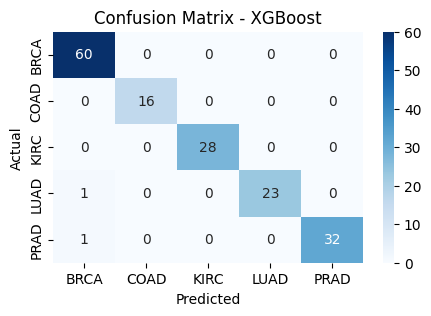

In [ ]:
# model evaluation & visualization

# Accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("RandomForest Accuracy:", accuracy_score(y_test, y_pred_1))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_2))

# Classification report
print("\nRandomForest Classification Report:")
print(classification_report(y_test, y_pred_1))

print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_2))

def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y))
    plt.figure(figsize=(5, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_conf_matrix(y_test, y_pred_1, "RandomForest")
plot_conf_matrix(y_test, y_pred_2, "XGBoost")

In [ ]:
input_dim = X.shape[1]
print(input_dim)

8000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 169ms/step - accuracy: 0.7288 - loss: 0.7462 - val_accuracy: 0.3727 - val_loss: 9.5596
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 183ms/step - accuracy: 0.9825 - loss: 0.0478 - val_accuracy: 0.7950 - val_loss: 0.8420
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 174ms/step - accuracy: 0.9998 - loss: 0.0090 - val_accuracy: 0.8509 - val_loss: 0.4512
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.9006 - val_loss: 0.3040
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 328ms/step - accuracy: 0.9973 - loss: 0.0110 - val_accuracy: 0.6770 - val_loss: 2.1276
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 188ms/step - accuracy: 0.9949 - loss: 0.0294 - val_accuracy: 0.7329 - val_loss: 1.9910
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 194ms/step - accuracy: 0.9768 - loss: 0.1212 - val_accuracy: 0.8075 - val_loss: 2.2890
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - accuracy: 0.9874 - loss: 0.0382 - val_accuracy: 0.

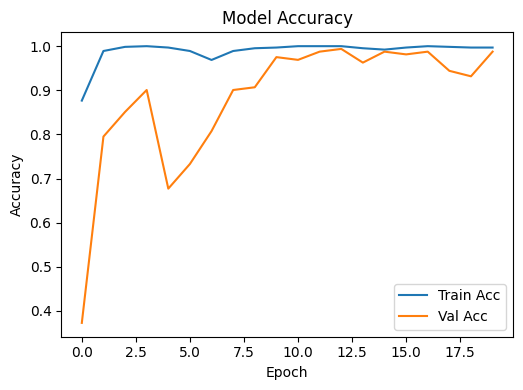

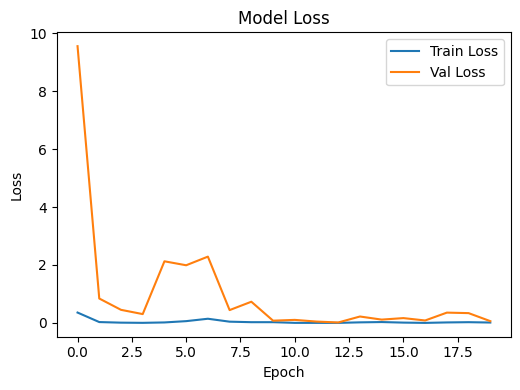

In [ ]:
# model building: DL Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# One-hot encode the labels
y_train_one_hot = to_categorical(y_train_encoded, num_classes=5)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=5)

neural_network = Sequential([
    Dense(1024, activation='relu', input_shape=(8000,)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(512, activation='relu'),
    Dropout(0.3),

    Dense(256, activation='relu'),
    Dropout(0.2),

    Dense(5, activation='softmax')
])

neural_network.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

results = neural_network.fit(x_train_norm, y_train_one_hot, validation_data=(x_test_norm, y_test_one_hot), epochs=20, batch_size=32, verbose=1)

# Accuracy
def plot_accuracy(history):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(results.history['accuracy'], label='Train Acc')
    plt.plot(results.history['val_accuracy'], label='Val Acc')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Loss
def plot_loss(history):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 2)
    plt.plot(results.history['loss'], label='Train Loss')
    plt.plot(results.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_accuracy(results)
plot_loss(results)


In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/Kaggle_API/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download brunogrisci/brain-cancer-gene-expression-cumida

Dataset URL: https://www.kaggle.com/datasets/brunogrisci/brain-cancer-gene-expression-cumida
License(s): ODbL-1.0
  0% 0.00/53.4M [00:00<?, ?B/s]
100% 53.4M/53.4M [00:00<00:00, 1.06GB/s]


In [ ]:
! unzip brain-cancer-gene-expression-cumida.zip

Archive:  brain-cancer-gene-expression-cumida.zip
  inflating: Brain_GSE50161.csv      


In [ ]:
# raw data preping for targeted cancer data

df_brain = pd.read_csv("/content/Brain_GSE50161.csv")
df_brain.head()

# data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

X_brain = df_brain.drop(columns=["type", "samples"])
y_brain = df_brain["type"]
# types = ['ependymoma', 'glioblastoma', 'medulloblastoma', 'normal', 'pilocytic_astrocytoma']
x_train_brain,x_test_brain,y_train_brain,y_test_brain=train_test_split(X_brain,y_brain,test_size=0.2,random_state=42)
min_max_scaler_brain=MinMaxScaler()
x_train_norm_brain=min_max_scaler_brain.fit_transform(x_train_brain)
x_test_norm_brain=min_max_scaler_brain.fit_transform(x_test_brain)

print(X_brain.head())
print(y_brain.head())

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

y_train_one_hot = to_categorical(y_train_encoded, num_classes=5)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=5)


   1007_s_at   1053_at     117_at    121_at  1255_g_at   1294_at   1316_at  \
0  12.498150  7.604868   6.880934  9.027128   4.176175  7.224920  6.085942   
1  13.067436  7.998090   7.209076  9.723322   4.826126  7.539381  6.250962   
2  13.068179  8.573674   8.647684  9.613002   4.396581  7.813101  6.007746   
3  12.456040  9.098977   6.628784  8.517677   4.154847  8.361843  6.596064   
4  12.699958  8.800721  11.556188  9.166309   4.165891  7.923826  6.212754   

    1320_at  1405_i_at   1431_at  ...  AFFX-r2-Ec-bioD-3_at  \
0  6.835999   5.898355  5.513410  ...              9.979005   
1  8.012549   5.453147  6.173106  ...             11.924749   
2  7.178156   8.400266  6.323471  ...             12.154405   
3  6.347285   4.900380  6.008684  ...             11.969072   
4  6.866387   5.405628  5.279579  ...             11.411701   

   AFFX-r2-Ec-bioD-5_at  AFFX-r2-P1-cre-3_at  AFFX-r2-P1-cre-5_at  \
0              9.926470            12.719785            12.777792   
1             

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 580ms/step - accuracy: 0.3740 - loss: 1.6915 - val_accuracy: 0.2692 - val_loss: 9.8830
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 501ms/step - accuracy: 0.6873 - loss: 0.8736 - val_accuracy: 0.3077 - val_loss: 8.7862
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 458ms/step - accuracy: 0.7598 - loss: 0.7047 - val_accuracy: 0.5000 - val_loss: 5.4653
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 349ms/step - accuracy: 0.8507 - loss: 0.5692 - val_accuracy: 0.6538 - val_loss: 3.1411
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 309ms/step - accuracy: 0.8816 - loss: 0.4841 - val_accuracy: 0.5769 - val_loss: 3.2529
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 274ms/step - accuracy: 0.9056 - loss: 0.2849 - val_accuracy: 0.4231 - val_loss: 4.4124
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 331ms/step - accuracy: 0.9300 - loss: 0.2305 - val_accuracy: 0.3846 - val_loss: 5.8218
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 370ms/step - accuracy: 0.9506 - loss: 0.2431 - val_accuracy: 0.3846 - val_loss:

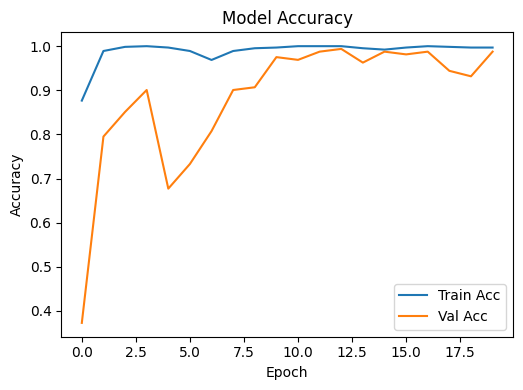

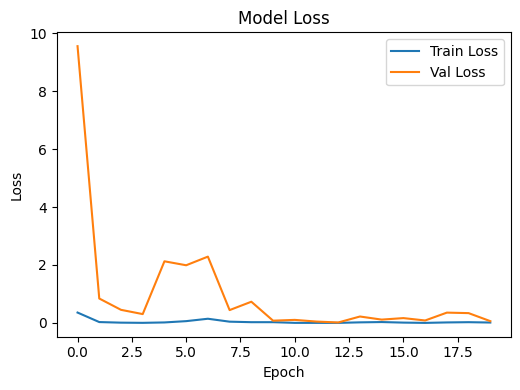

In [ ]:
# model building: Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import numpy as np

# Encode labels to numerical values for brain cancer data
label_encoder_brain = LabelEncoder()
y_train_encoded_brain = label_encoder_brain.fit_transform(y_train_brain)
y_test_encoded_brain = label_encoder_brain.transform(y_test_brain)

# One-hot encode the labels for brain cancer data
y_train_one_hot_brain = to_categorical(y_train_encoded_brain, num_classes=len(np.unique(y_brain)))
y_test_one_hot_brain = to_categorical(y_test_encoded_brain, num_classes=len(np.unique(y_brain)))


model = Sequential([
    Dense(256, activation='relu', input_shape=(X_brain.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation='relu'),
    Dropout(0.1),

    Dense(len(np.unique(y_brain)), activation='softmax') # Dynamically set number of classes
])

model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='categorical_crossentropy', # Use categorical_crossentropy for one-hot encoded labels
    metrics=['accuracy']
)

history = model.fit(
    x_train_norm_brain, y_train_one_hot_brain,
    validation_data=(x_test_norm_brain, y_test_one_hot_brain),
    epochs=20, # Increased epochs for potentially better training
    batch_size=32,
    verbose=1
)

# model evaluation & visualization
plot_accuracy(history)
plot_loss(history)